In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:

!git clone https://github.com/Mouneshgouda/Machine_Learning

fatal: destination path 'Machine_Learning' already exists and is not an empty directory.


In [103]:
# train dataset loading

train_claim=pd.read_csv('/content/Machine_Learning/Problem Statement/Train data/Train_Claim.csv')
train_Demographic=pd.read_csv('/content/Machine_Learning/Problem Statement/Train data/Train_Demographics.csv')
train_policy=pd.read_csv('/content/Machine_Learning/Problem Statement/Train data/Train_Policy.csv')
train_vehicle=pd.read_csv('/content/Machine_Learning/Problem Statement/Train data/Train_Vehicle.csv')
train=pd.read_csv('/content/Machine_Learning/Problem Statement/Train data/Traindata_with_Target.csv')


In [104]:
# test dataset loading

test_claim=pd.read_csv('/content/Machine_Learning/Problem Statement/Test Data/Test_Claim.csv')
test_Demographic=pd.read_csv('/content/Machine_Learning/Problem Statement/Test Data/Test_Demographics.csv')
test_policy=pd.read_csv('/content/Machine_Learning/Problem Statement/Test Data/Test_Policy.csv')
test_vehicle=pd.read_csv('/content/Machine_Learning/Problem Statement/Test Data/Test_Vehicle.csv')
test=pd.read_csv('/content/Machine_Learning/Problem Statement/Test Data/Test.csv')

In [105]:
test.head()

,CustomerID
0,Cust10008
1,Cust10010
2,Cust10015
3,Cust10020
4,Cust1003


In [106]:
# here Conversion of Catrgorical column to object type
train_Demographic['InsuredZipCode']=train_Demographic['InsuredZipCode'].astype('object')
test_Demographic['InsuredZipCode']=test_Demographic['InsuredZipCode'].astype('object')
train_policy['InsurancePolicyNumber']=train_policy['InsurancePolicyNumber'].astype('object')
test_policy['InsurancePolicyNumber']=test_policy['InsurancePolicyNumber'].astype('object')
train_claim['NumberOfVehicles']=train_claim['NumberOfVehicles'].astype('object')
train_claim['BodilyInjuries']=train_claim['BodilyInjuries'].astype('object')
train_claim['Witnesses']=train_claim['Witnesses'].astype('object')
test_claim['NumberOfVehicles']=test_claim['NumberOfVehicles'].astype('object')
test_claim['BodilyInjuries']=test_claim['BodilyInjuries'].astype('object')
test_claim['Witnesses']=test_claim['Witnesses'].astype('object')

In [107]:
train_vehicle.pivot(index='CustomerID',columns='VehicleAttribute',values='VehicleAttributeDetails').head(5)

VehicleAttribute,VehicleID,VehicleMake,VehicleModel,VehicleYOM
CustomerID,,,,
Cust10000,Vehicle26917,Audi,A5,2008
Cust10001,Vehicle15893,Audi,A5,2006
Cust10002,Vehicle5152,Volkswagen,Jetta,1999
Cust10003,Vehicle37363,Volkswagen,Jetta,2003
Cust10004,Vehicle28633,Toyota,CRV,2010


In [108]:
#here reseting the index
train_vehicle=train_vehicle.pivot(index='CustomerID',columns='VehicleAttribute',values='VehicleAttributeDetails').reset_index()
test_vehicle=test_vehicle.pivot(index='CustomerID',columns='VehicleAttribute',values='VehicleAttributeDetails').reset_index()

In [109]:
# using lambda function for changing y=0 and x=1 for target value
train['ReportedFraud']=train['ReportedFraud'].apply(lambda x: 1 if x=='Y' else 0)

In [110]:
# using inner jion for merging operation using on because it comes in first colume
Merged_Train1 = pd.merge(train,train_claim, how = "inner", on='CustomerID')
Merged_Train2 = pd.merge(Merged_Train1,train_Demographic, how ="inner", on='CustomerID')
Merged_Train3 = pd.merge(Merged_Train2,train_policy, how ="inner", on='CustomerID')
Merged_Train4 = pd.merge(Merged_Train3,train_vehicle, how ="inner", on='CustomerID')
data=Merged_Train4

In [111]:
data.head(2)

,CustomerID,ReportedFraud,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust20065,0,09-01-2015,Multi-vehicle Collision,Rear Collision,Total Loss,Other,State9,City4,Location 1404,...,State2,250/500,2000,1142.87,0,own-child,Vehicle30662,Mercedes,E400,2005
1,Cust37589,0,20-02-2015,Single Vehicle Collision,Side Collision,Minor Damage,Ambulance,State4,City3,Location 1675,...,State2,100/300,1000,1274.38,2857344,own-child,Vehicle17183,Toyota,Highlander,2010


In [112]:
# using inner jion for merging operation using on because it comes in first colume

Merged_Test1 = pd.merge(test,test_claim, how = "inner", on='CustomerID')
Merged_Test2 = pd.merge(Merged_Test1,test_Demographic, how ="inner", on='CustomerID')
Merged_Test3 = pd.merge(Merged_Test2,test_policy, how ="inner", on='CustomerID')
Merged_Test4 = pd.merge(Merged_Test3,test_vehicle, how ="inner", on='CustomerID')
data_test=Merged_Test4

In [113]:
data_test.head(2)

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10008,2015-02-05,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City2,Location 1354,4,...,State2,500/1000,2000,1006.00,0,own-child,Vehicle34362,Volkswagen,Passat,1995
1,Cust10010,2015-01-13,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City5,Location 1383,16,...,State3,100/300,500,1279.17,0,unmarried,Vehicle17046,Nissan,Ultima,2006


In [114]:
data.shape

(28836, 42)

In [115]:
data_test.shape

(8912, 41)

In [116]:
# s1=set(data.columns)
# s2=set(data_test.columns)
# s1.difference(s2)

In [117]:
# data['ReportedFraud'].describe()

In [118]:
# data.isnull().sum()

In [119]:
# using insignificant to checking for not importent columns
def insignificantCols(dataset):
    insignificantCols=[]
    size=dataset.shape[0]
    for i in dataset.columns:
        x=dataset[i].nunique()
        if (x==size)|(x==1):
            insignificantCols.append(i)
    return insignificantCols
#Printing insignificant columns
insigCol=insignificantCols(data)
insigCol

['CustomerID', 'Country', 'InsurancePolicyNumber', 'VehicleID']

In [120]:
data.drop(['CustomerID', 'Country', 'InsurancePolicyNumber', 'VehicleID'],axis=1,inplace=True)

In [121]:
data_test.drop(['CustomerID', 'Country', 'InsurancePolicyNumber', 'VehicleID'],axis=1,inplace=True)

In [122]:
#Dropping columns with missing value  higher

data.drop(['InsuredGender','InsuredZipCode','IncidentState','InsuredHobbies','Policy_CombinedSingleLimit','UmbrellaLimit','InsuredRelationship','TypeOfCollission','AmountOfInjuryClaim','AmountOfPropertyClaim','AmountOfVehicleDamage','IncidentAddress'],axis=1,inplace=True)
#Dropping columns with missing value  higher
data_test.drop(['InsuredGender','InsuredZipCode','IncidentState','InsuredHobbies','Policy_CombinedSingleLimit','UmbrellaLimit','InsuredRelationship','TypeOfCollission','AmountOfInjuryClaim','AmountOfPropertyClaim','AmountOfVehicleDamage','IncidentAddress'],axis=1,inplace=True)

In [123]:
data.shape

(28836, 26)

In [124]:
# data.describe()

In [125]:
data.isnull().sum()

,0
ReportedFraud,0
DateOfIncident,0
TypeOfIncident,0
SeverityOfIncident,0
AuthoritiesContacted,2692
IncidentCity,0
IncidentTime,0
NumberOfVehicles,0
PropertyDamage,0
BodilyInjuries,0


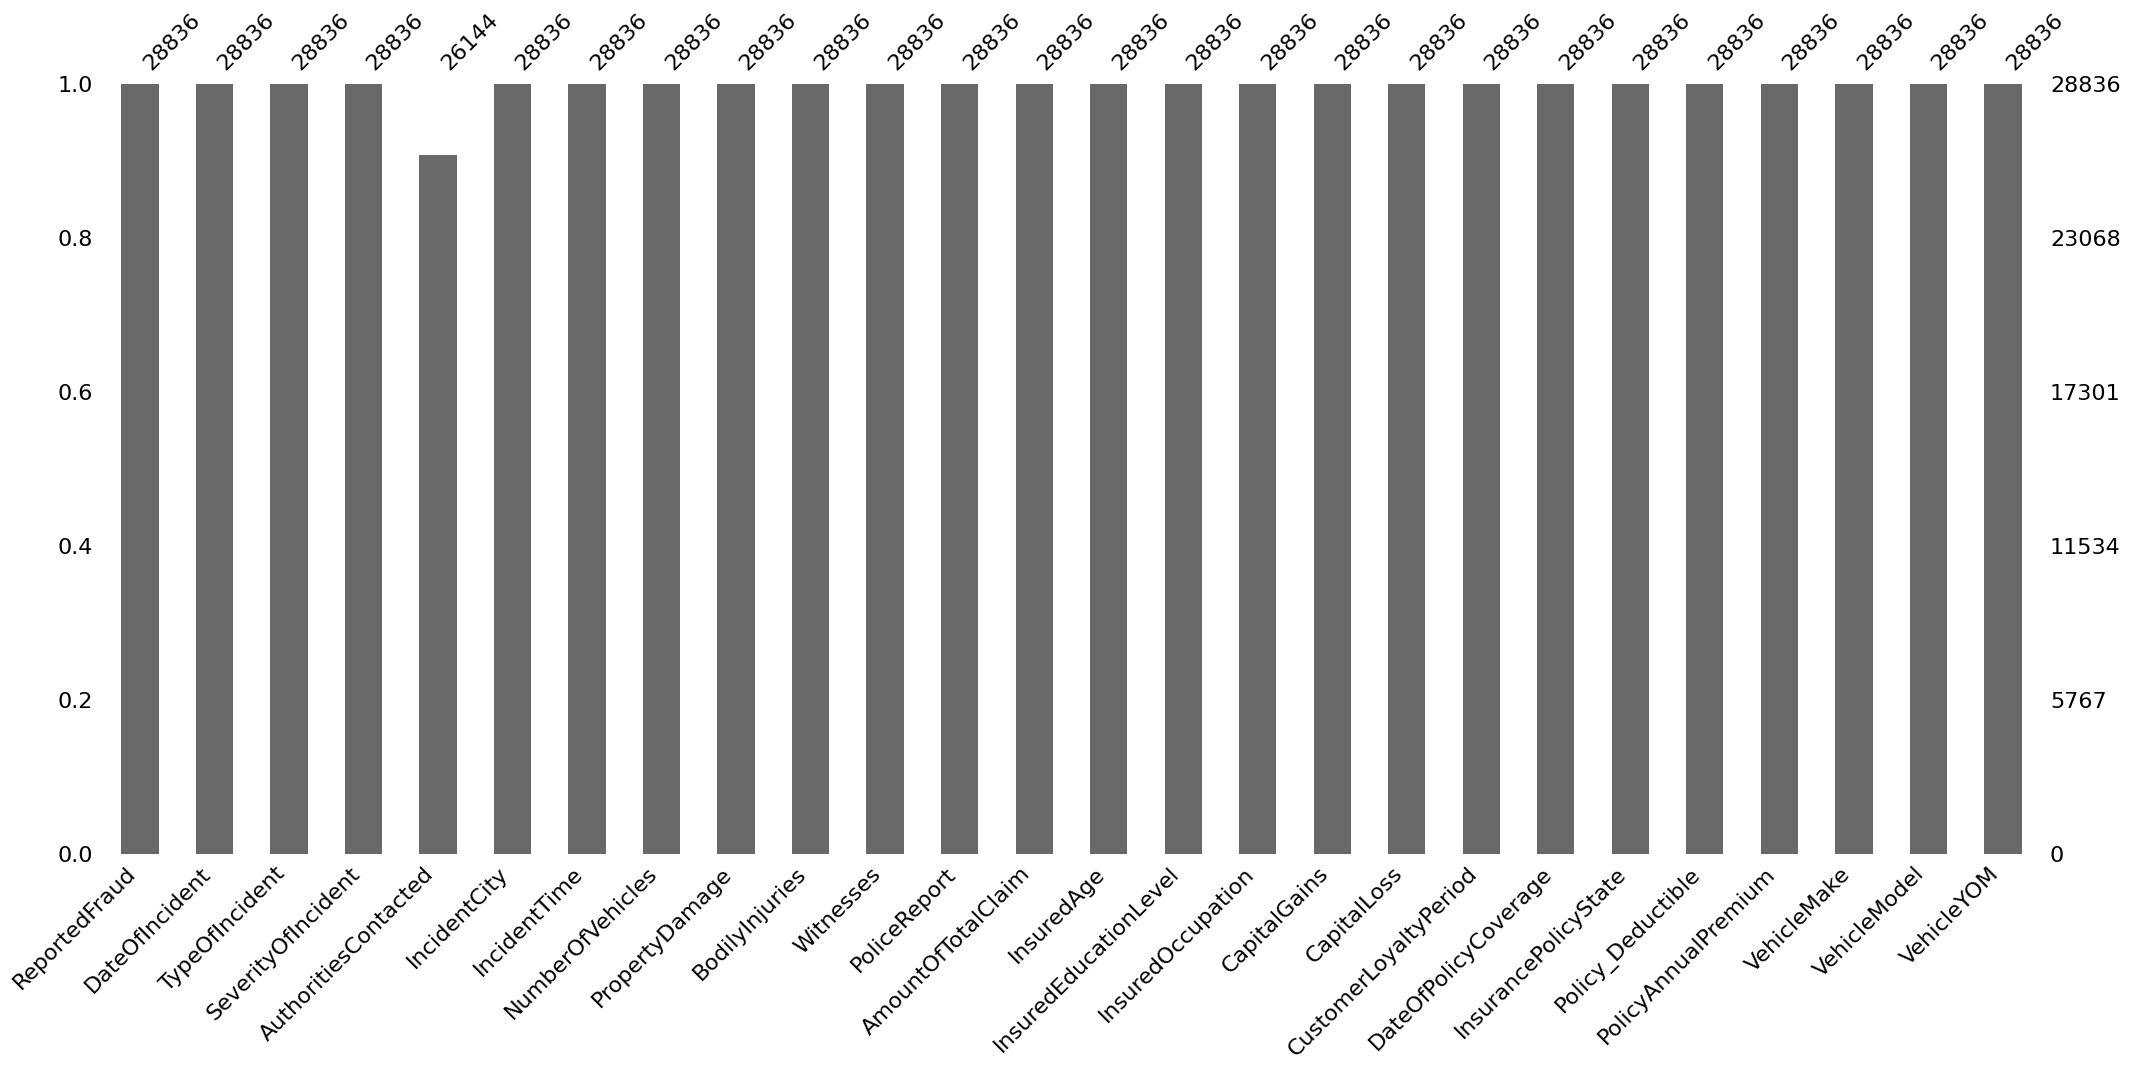

In [100]:
#using missingno to find the missing values
import missingno as msno
#bar plot finding missing values
msno.bar(data)
plt.show()

In [101]:
#cheking null values
data_test.isnull().sum()

,0
DateOfIncident,0
TypeOfIncident,0
SeverityOfIncident,0
AuthoritiesContacted,947
IncidentCity,0
IncidentTime,0
NumberOfVehicles,0
PropertyDamage,0
BodilyInjuries,0
Witnesses,0


In [126]:
#Extracting month and day from Date of Incident and policy coverage
data['Incident_month'] = pd.DatetimeIndex(data['DateOfIncident']).month
data['Incident_day'] = pd.DatetimeIndex(data['DateOfIncident']).day
data['Policy_month'] = pd.DatetimeIndex(data['DateOfPolicyCoverage']).month